## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.

## PACE Stages

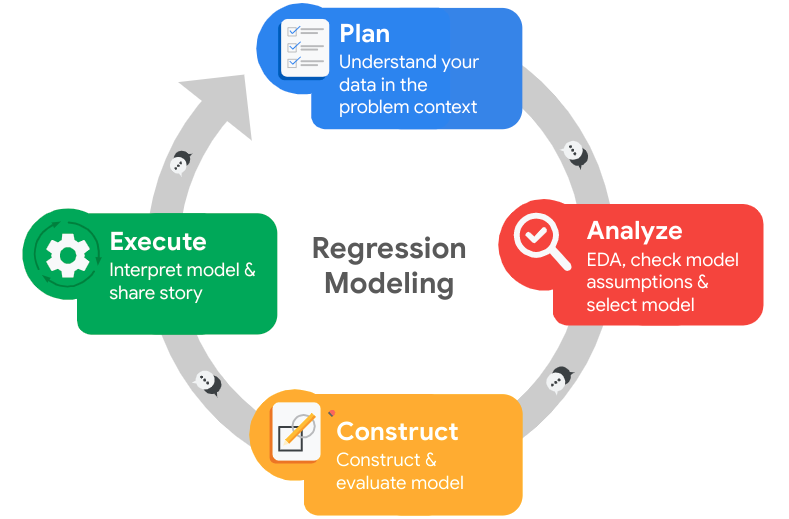

# Pace : Plan

## understand the business senaria and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company

Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


### Step 1 import packages

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split , cross_validate , GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import accuracy_score, f1_score,precision_score , confusion_matrix ,ConfusionMatrixDisplay,r2_score,recall_score
from sklearn.metrics import roc_auc_score, roc_curve

### loading the data

In [2]:
#
data = pd.read_csv('HR_comma_sep.csv')

data.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2 Data Exploration (inital EDA and Data Cleaning)

In [3]:
for col in data.columns :
  print(data[col].describe())
  print("******************")

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64
******************
count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64
******************
count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64
******************
count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64
******************
count    14999.000000
mean         3.498233
std          1.46

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data['salary'].dtype

dtype('O')

In [6]:
for col in data.columns :
  if data[col].dtype == 'O' :
    print(f"{col} colume unique values is {data[col].unique()}")
    print("***********")

Department colume unique values is ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
***********
salary colume unique values is ['low' 'medium' 'high']
***********


### Rename Columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
data.rename(columns={'last_evaluation':'employee_performance','time_spend_company':'years_spend_company'},inplace=True)
data

,satisfaction_level,employee_performance,number_project,average_montly_hours,years_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
data.columns

Index(['satisfaction_level', 'employee_performance', 'number_project',
       'average_montly_hours', 'years_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
# data['Month_spend_company'] = data['years_spend_company'] * 12

In [11]:
# data.head(15)

### Checking missing value

In [12]:
data.isnull().sum()

satisfaction_level       0
employee_performance     0
number_project           0
average_montly_hours     0
years_spend_company      0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

In [13]:
data.duplicated().sum()

3008

In [14]:
duplic_data = data.drop_duplicates()

In [15]:
duplic_data.shape

(11991, 10)

In [16]:
duplic_data[duplic_data['employee_performance'] == 0.75].sample(n=10)

,satisfaction_level,employee_performance,number_project,average_montly_hours,years_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1909,0.14,0.75,4,277,5,1,1,0,sales,medium
5053,0.93,0.75,3,243,2,0,0,0,sales,medium
6498,0.60,0.75,5,233,3,1,0,0,sales,low
10739,0.69,0.75,5,196,3,0,0,0,support,medium
11714,0.51,0.75,3,133,3,0,0,0,sales,medium
9952,0.50,0.75,4,239,2,0,0,0,accounting,low
9832,0.91,0.75,3,166,2,0,0,0,IT,low
2248,0.53,0.75,4,239,2,1,0,0,technical,medium
10058,0.84,0.75,2,168,2,0,0,0,technical,low
5311,0.86,0.75,5,157,4,0,0,0,support,low


In [17]:
data.sample(n=10)

,satisfaction_level,employee_performance,number_project,average_montly_hours,years_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1599,0.41,0.51,2,144,3,0,1,0,RandD,low
14967,0.43,0.51,2,128,3,0,1,0,sales,low
6459,0.16,0.64,6,143,5,1,0,0,support,low
4769,0.13,0.95,5,149,2,0,0,0,technical,low
10323,0.73,0.60,4,166,3,0,0,0,sales,high
14251,0.87,0.88,5,269,5,0,1,0,technical,low
8604,0.99,0.73,4,224,2,0,0,0,support,low
14375,0.90,0.99,5,260,5,0,1,0,sales,low
231,0.92,0.99,5,255,6,0,1,0,sales,low
11127,0.71,0.76,4,148,8,0,0,0,accounting,medium


In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(11991, 10)

### Check outliers

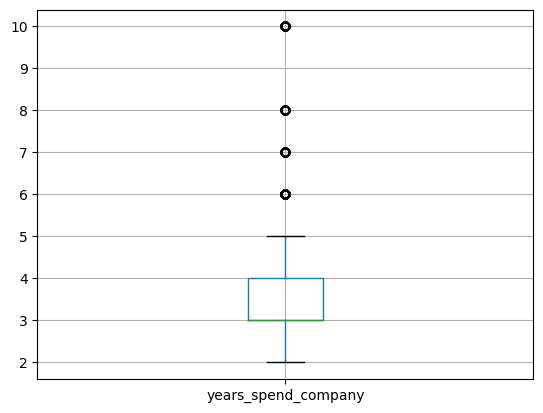

In [20]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

data.boxplot(column=['years_spend_company'])
plt.show()

In [21]:
quan_25 = data['years_spend_company'].quantile(0.25)

quan_75 = data['years_spend_company'].quantile(0.75)

IQR = quan_75 - quan_25

lower_limit = quan_25 - 1.5 * IQR

upper_limit = quan_75 + 1.5 * IQR


outliers = data[(data['years_spend_company'] < lower_limit) | (data['years_spend_company'] > upper_limit)]

print(len(outliers))

# Reassign the outliers
persentile_90 = np.percentile(data['years_spend_company'],90)

persentile_10 = np.percentile(data['years_spend_company'],10)

data['years_spend_company'] = data['years_spend_company'].apply(lambda x :(persentile_10 if x < persentile_10
                                                                else persentile_90 if x > persentile_90
                                                                else x))



824


<ipython-input-21-58d39f73b3dd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['years_spend_company'] = data['years_spend_company'].apply(lambda x :(persentile_10 if x < persentile_10


###Checking Outliers for All Data

## pAce : Analysis Stage
Perform EDA (analyze relationships between variables)


### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


In [22]:
data.head()

,satisfaction_level,employee_performance,number_project,average_montly_hours,years_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3.0,0,1,0,sales,low
1,0.80,0.86,5,262,5.0,0,1,0,sales,medium
2,0.11,0.88,7,272,4.0,0,1,0,sales,medium
3,0.72,0.87,5,223,5.0,0,1,0,sales,low
4,0.37,0.52,2,159,3.0,0,1,0,sales,low


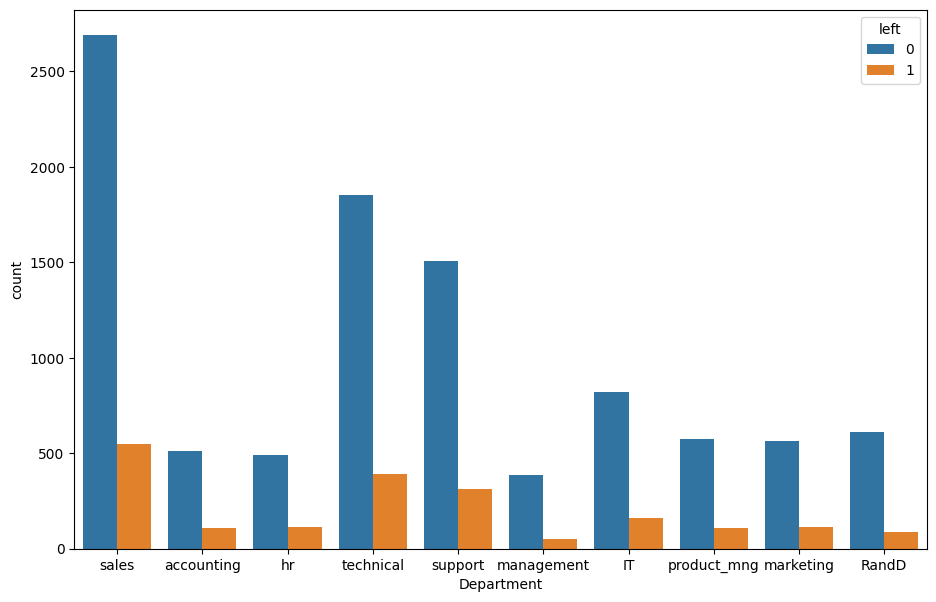

In [23]:
plt.figure(figsize=(11,7))
sns.countplot(data,x='Department',hue='left')
plt.show()

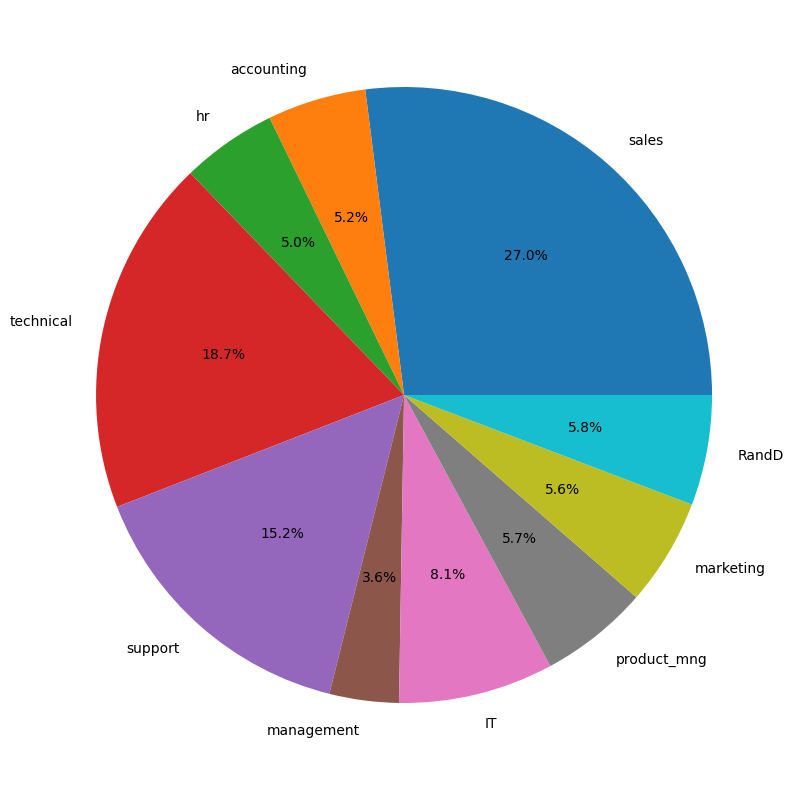

In [24]:
depart_list = [depart for depart in data['Department'].unique()]
depart_persentage = [len(data[data['Department'] == d])/len(data) *100 for d in data['Department'].unique()]
plt.figure(figsize=(12,10))
plt.pie(depart_persentage,labels=depart_list , autopct="%1.1f%%")
plt.show()

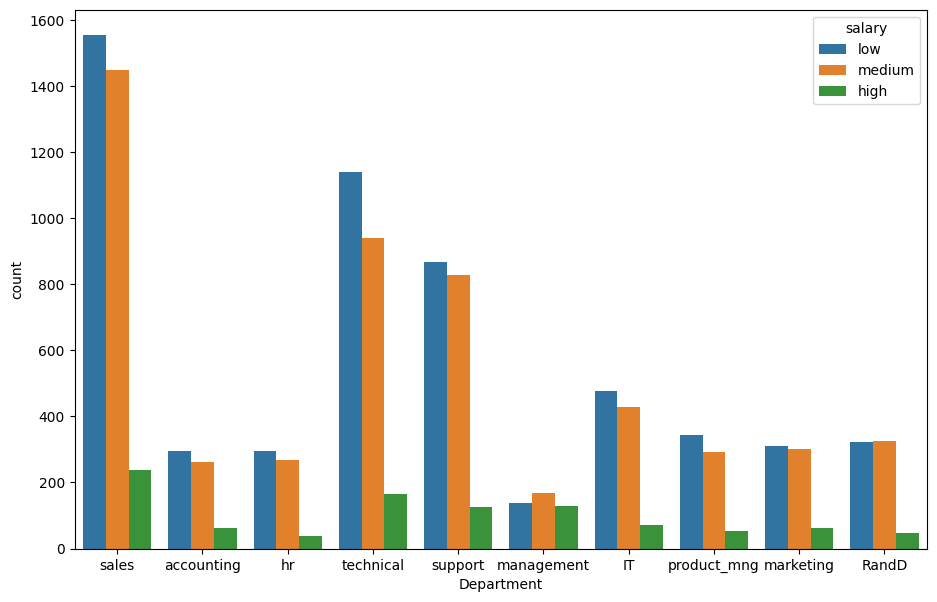

In [25]:
plt.figure(figsize=(11,7))
sns.countplot(data,x='Department',hue='salary')
plt.show()

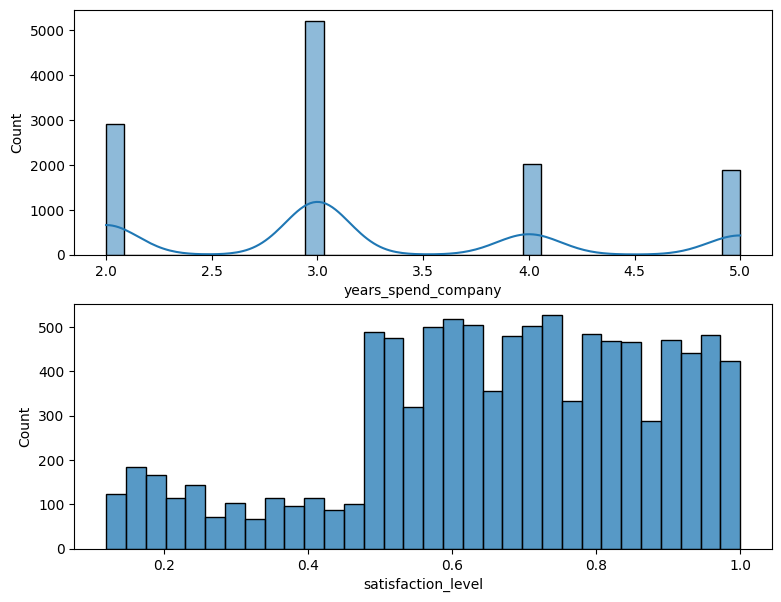

In [26]:
left_sam = data[data['left'] == 0]
low_Salary_sam = data[data['salary'] == 'low']
fig , ax = plt.subplots(2,1,figsize=(9,7))
sns.histplot(data,x='years_spend_company',kde=True,ax=ax[0])
sns.histplot(left_sam,x='satisfaction_level',ax=ax[1])
plt.show()

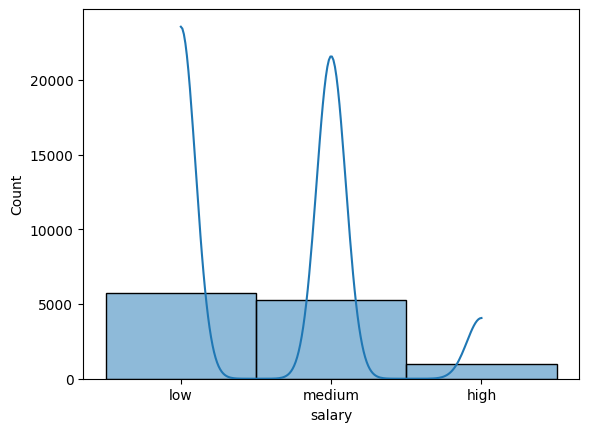

In [27]:
sns.histplot(data,x='salary',kde=True)
plt.show()

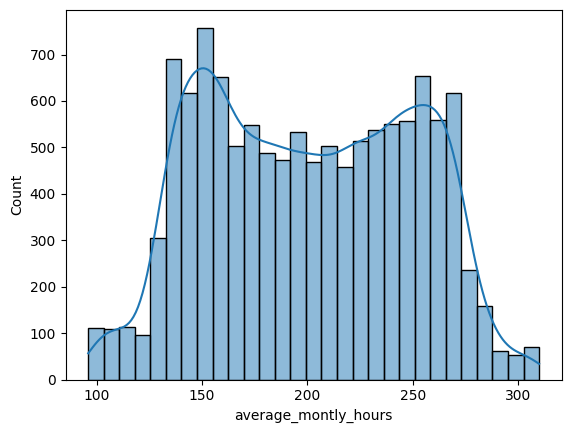

In [28]:
sns.histplot(data,x='average_montly_hours',kde=True)
plt.show()

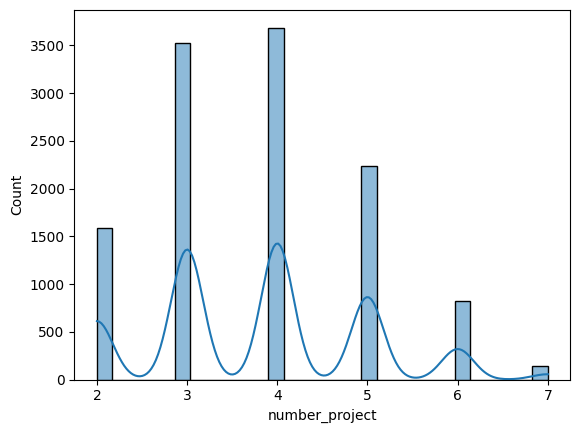

In [29]:
sns.histplot(data,x='number_project',kde=True)
plt.show()

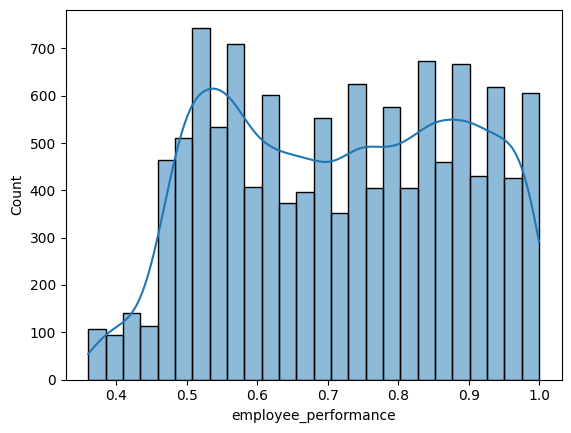

In [30]:
sns.histplot(data,x='employee_performance',kde=True)
plt.show()

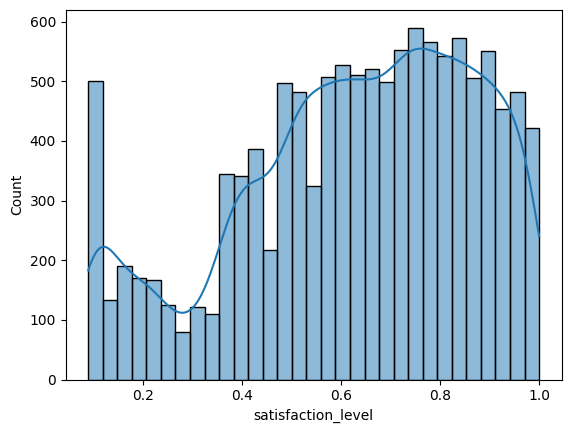

In [31]:
sns.histplot(data,x='satisfaction_level',kde=True)
plt.show()

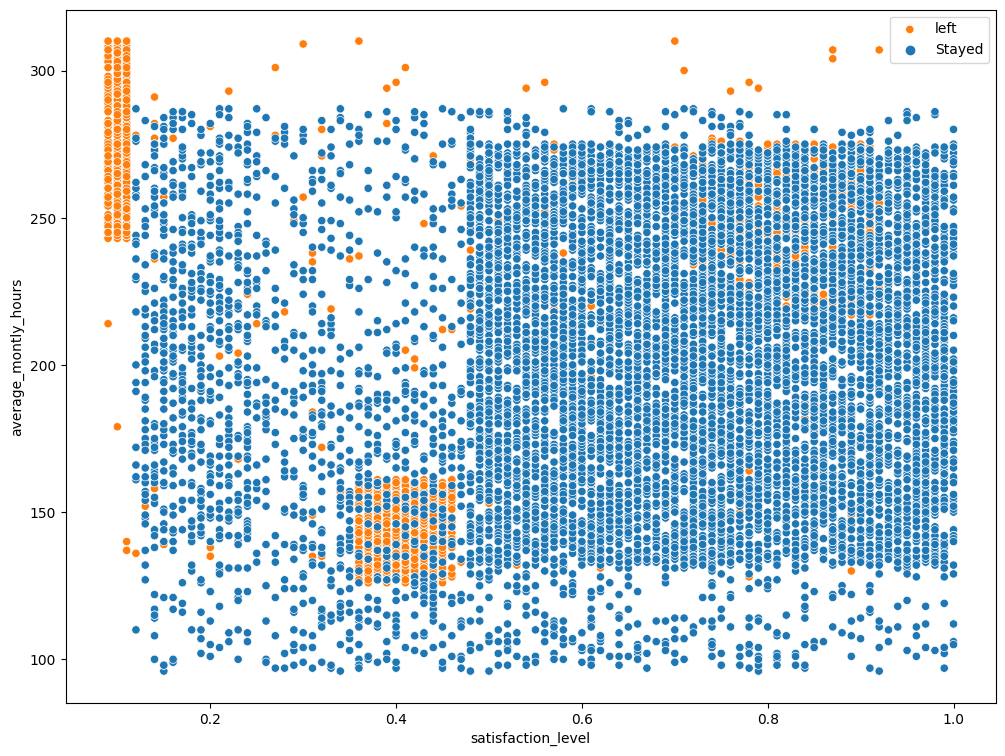

In [32]:
plt.figure(figsize=(12,9))
sns.scatterplot(data,x='satisfaction_level',y='average_montly_hours',hue='left')
plt.legend(labels=['left','Stayed'])
plt.show()

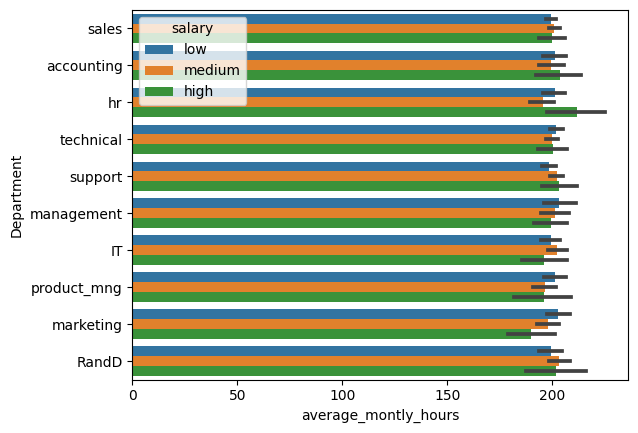

In [33]:
sns.barplot(data,x='average_montly_hours',y='Department',hue='salary')
plt.show()

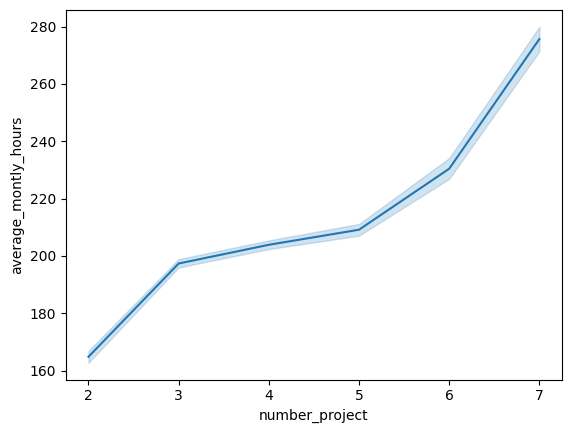

In [34]:
sns.lineplot(data,x='number_project',y='average_montly_hours')
plt.show()

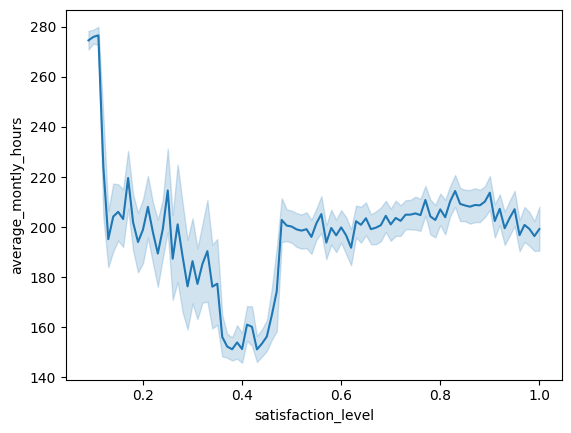

In [35]:
sns.lineplot(data,x='satisfaction_level',y='average_montly_hours')
plt.show()

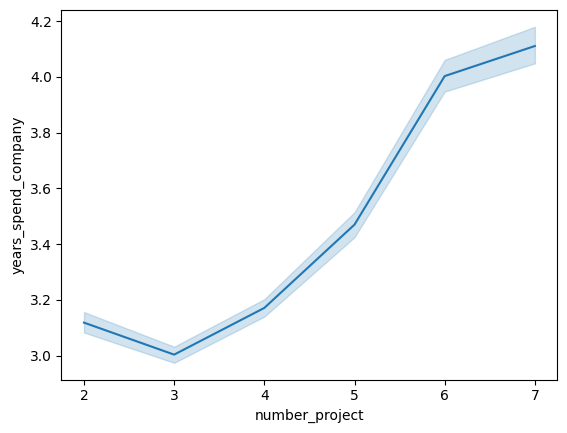

In [36]:
sns.lineplot(data,x='number_project',y='years_spend_company')
plt.show()

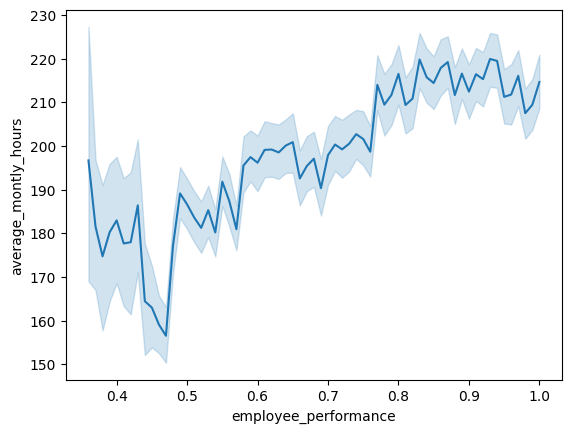

In [37]:
sns.lineplot(data,x='employee_performance',y='average_montly_hours')
plt.show()

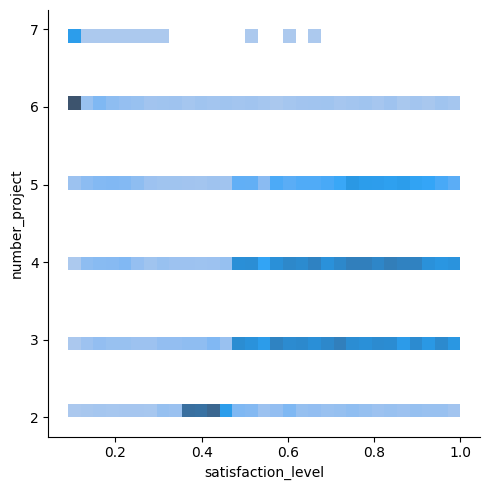

In [38]:
sns.displot(data,x='satisfaction_level',y='number_project')
plt.show()

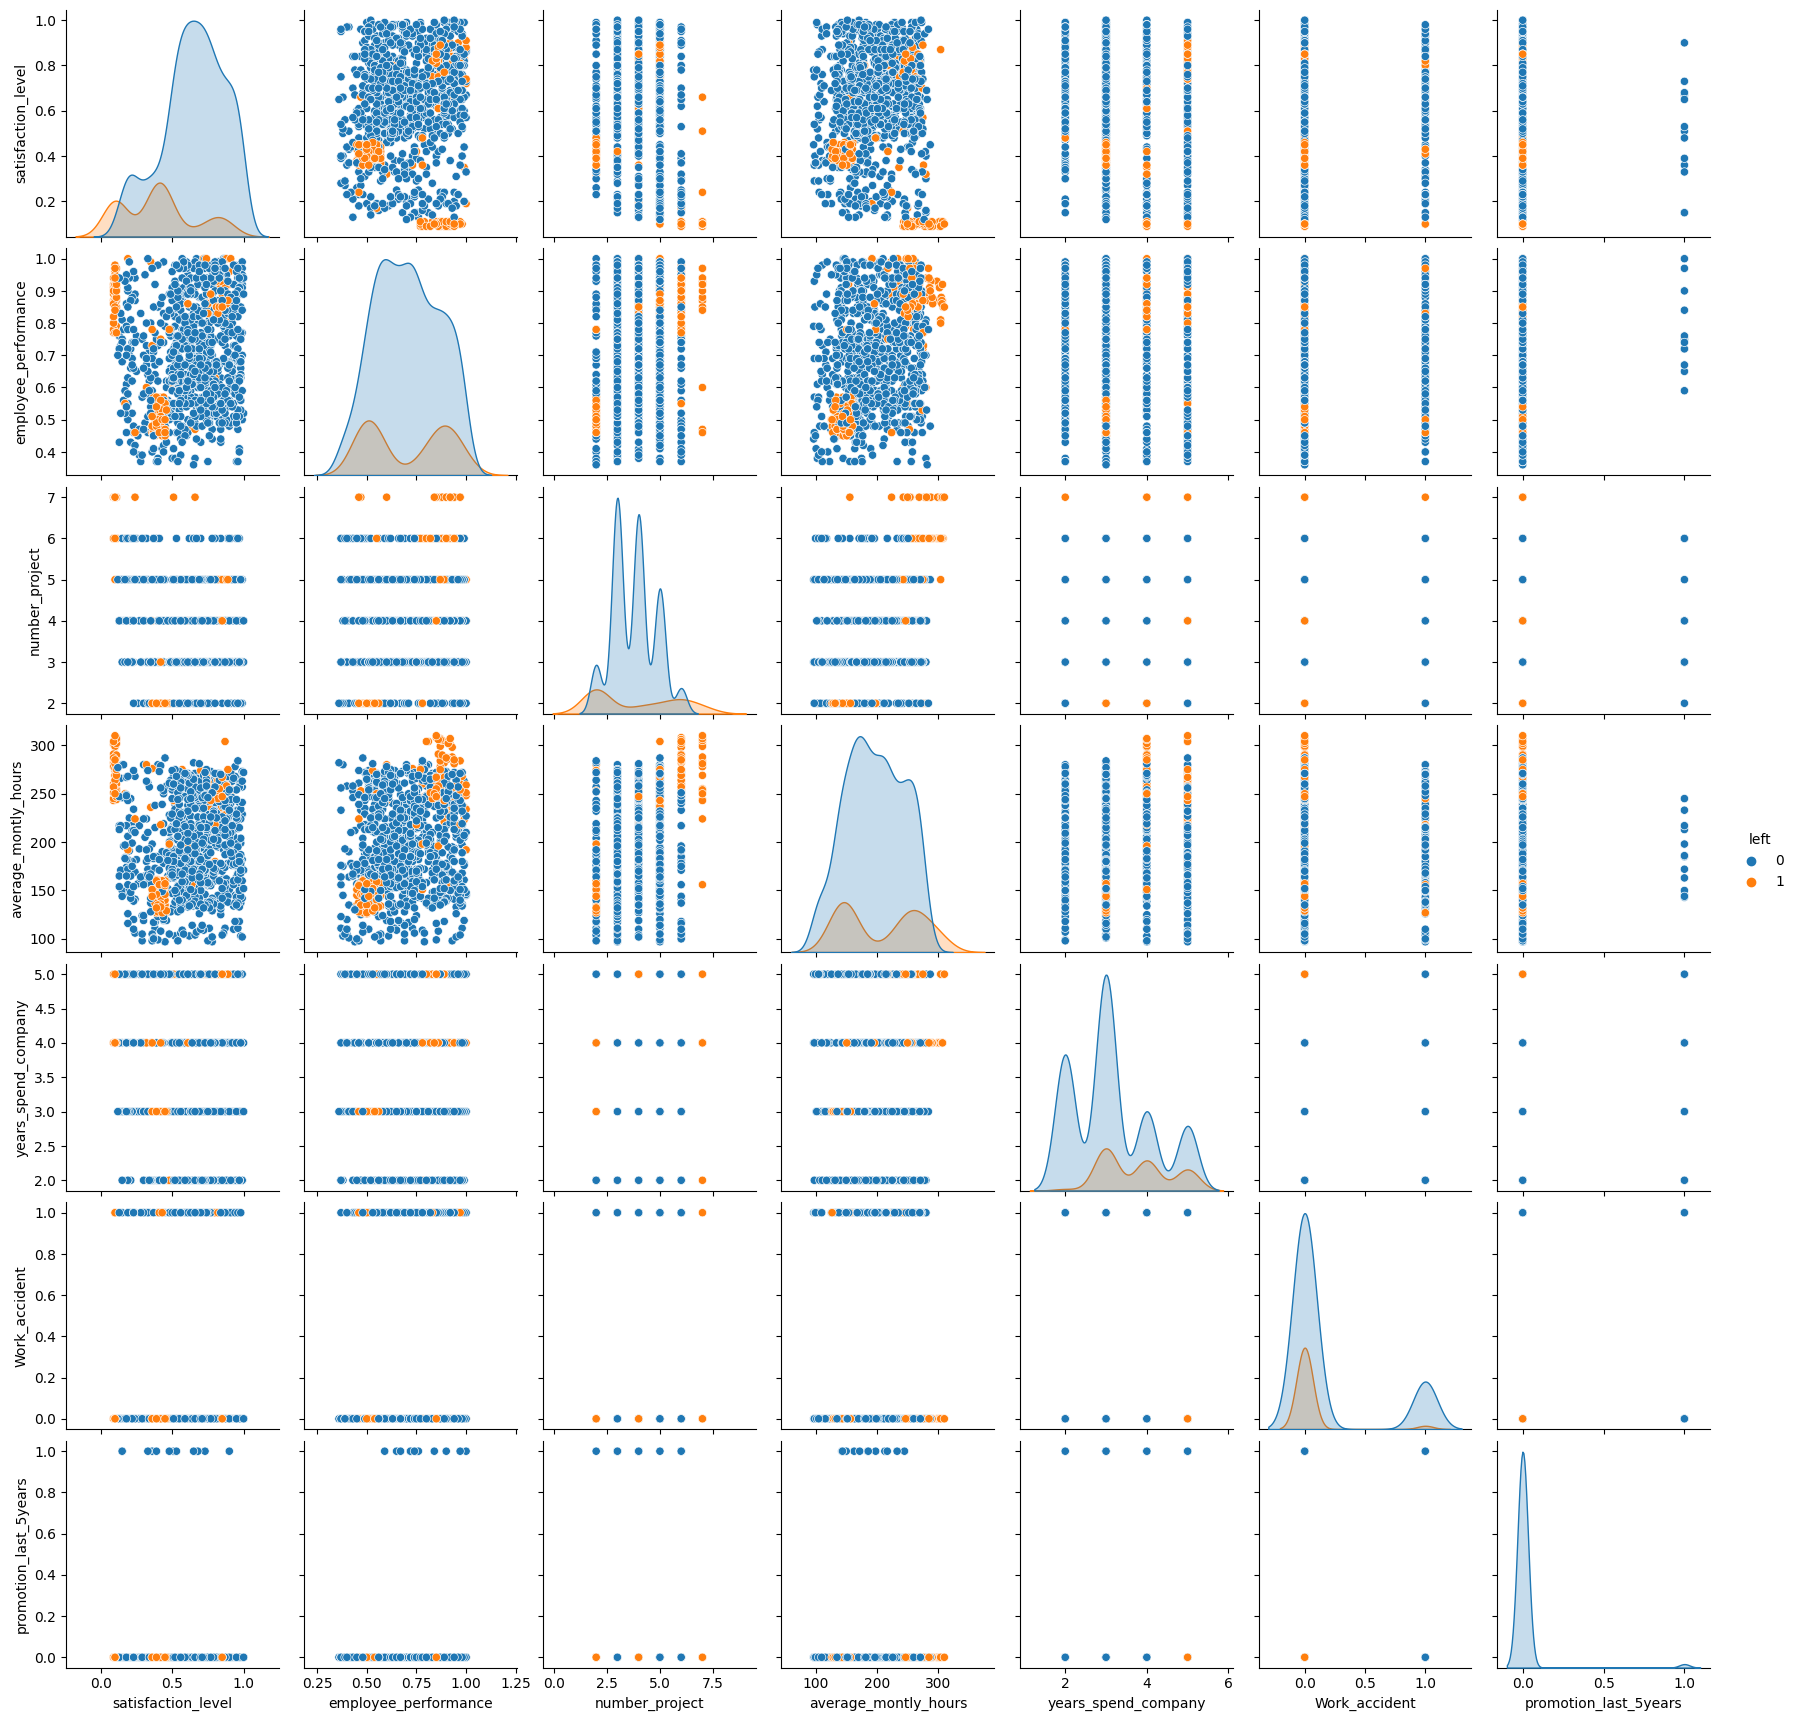

In [39]:
sns.pairplot(data.sample(n=1000),hue='left')
plt.show()

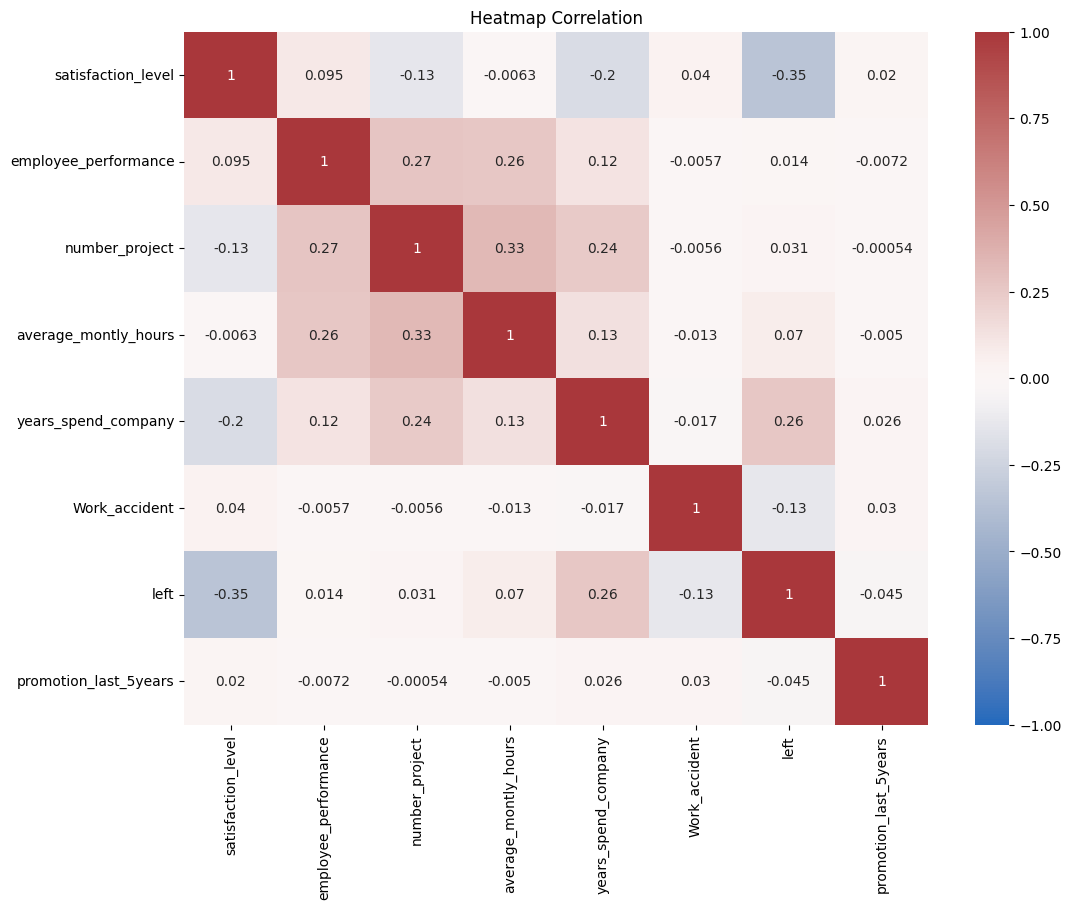

In [40]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),vmin=-1 , vmax=1,annot=True,cmap=sns.color_palette("vlag", as_cmap=True))
plt.title("Heatmap Correlation")
plt.show()

In [41]:
# Making a hypothesis that there is a positive correlation between Satisfaction level and other numircal Column
for col in data.columns:

  # Corr_Coeff indicates the strength and direction of the linear relationship between the two variables

  if data[col].dtype == "O" :
    break

  corr_coeff , p_value = pearsonr(data['satisfaction_level'],data[col])

  if p_value < 0.05 :

    print(f"Reject the null Hypothesis of {col} column")
    print("========>")

  else :

    print(f"fail reject the null Hypothesis of {col} column")
    print("========>")

  print(f"The {col} colume has corr_coeif {corr_coeff}")
  print(f"The {col} colume  has p-value {p_value}")
  print("********************")

Reject the null Hypothesis of satisfaction_level column
========>
The satisfaction_level colume has corr_coeif 0.9999999999999996
The satisfaction_level colume  has p-value 0.0
********************
Reject the null Hypothesis of employee_performance column
========>
The employee_performance colume has corr_coeif 0.09518595371704286
The employee_performance colume  has p-value 1.53118154773034e-25
********************
Reject the null Hypothesis of number_project column
========>
The number_project colume has corr_coeif -0.13324628390172882
The number_project colume  has p-value 1.2554191903215697e-48
********************
fail reject the null Hypothesis of average_montly_hours column
========>
The average_montly_hours colume has corr_coeif -0.006252354995781091
The average_montly_hours colume  has p-value 0.4936029319623445
********************
Reject the null Hypothesis of years_spend_company column
========>
The years_spend_company colume has corr_coeif -0.20240781329534052
The years_sp

### Insights

1)Most of the employee in the Sales Department there are 27 % of all employee, in the second place of comes Technical department with 18.7 % .

2)Most of the Salary are in the low salary categocal in all department .

3)in the column "average monthly hour" there is a peak over 700 hours and this columns represents as Bimodal Distribution

4)the column "years_spend_Company" move to positive direction in skewed with peak over 5000  

5)HR department working over 300 hour per month and they have higher salary more than the other

6)there a positive relationship between the number of projects and average monthly hour and this make sence also with employee performace and staible with saticfication level of employeee

7) I transformed the columns of Salary and Departement to prepare my data for getting ready for modeling

8)according to the hypothesis test there is a correlation between target (Satisfication Level) column and others except the average monthly hour

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Predicting who the employee more possibly will leave the company]

### Identify the types of models most appropriate for this task.

[as long as the outcome that we want to predict is a discret value for example 0 ,1 ,2 , that's type of problem is  classification problem and the appropriate models for this task LogisticRegression, RandomForest , KNN  ]

### Modeling Approach A: Group of Models

This approach covers implementation of Logistic Regression , KNN , SVC , XGBRF

In [42]:
def LTransforme(data):
  label = LabelEncoder()
  return label.fit_transform(data)


data['salary'] = LTransforme(data['salary'])
data['Department'] = LTransforme(data['Department'])

#### Note : LogisticRegression Model is Sensitve for outliters

In [43]:
df_copy = data.copy()

# outliers

df = df_copy[(df_copy['years_spend_company'] >= lower_limit) & (df_copy['years_spend_company'] <= upper_limit)]

len(df)

11991

In [44]:
X = df.drop(columns=['left'])

X

,satisfaction_level,employee_performance,number_project,average_montly_hours,years_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3.0,0,0,7,1
1,0.80,0.86,5,262,5.0,0,0,7,2
2,0.11,0.88,7,272,4.0,0,0,7,2
3,0.72,0.87,5,223,5.0,0,0,7,1
4,0.37,0.52,2,159,3.0,0,0,7,1
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,5.0,1,1,4,0
11996,0.74,0.95,5,266,5.0,0,1,4,0
11997,0.85,0.54,3,185,5.0,0,1,4,0
11998,0.33,0.65,3,172,5.0,0,1,5,0


In [45]:
y = df['left']

y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
models = [LogisticRegression(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),XGBRFClassifier()]

models_name = ['LogisticRegression','KNeighborsClassifier','SVC','RandomForestClassifier','XGBRFClassifier']

In [48]:
grid_1 = []
grid_2 = []
grid_3 = []
grid_4 = []
grid_5 = []

params = [
    {'model__penalty':['l2','l1'],'model__solver':['lbfgs','liblinear']},
    {'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10],'model__weights':['uniform', 'distance']},
    {'model__decision_function_shape':['ovo','ovr'],'model__degree':[1,2,3,4,5]},
    {'model__criterion':['gini','entropy','log_loss']},
    {'model__learning_rate':[0.001,0.01,0.1,1]}
]

for i in range(len(models)) :
  pipe = Pipeline([
      ('Sacler',StandardScaler()),
      ('model',models[i])
    ])

  # print(pipe.get_params())

  pipe.fit(X_train,y_train)

  grid = GridSearchCV(
      estimator=pipe,
      param_grid=params[i],
      cv=3
    )

  grids = [grid_1,grid_2,grid_3,grid_4,grid_5]

  grids[i].append(grid)

  grid.fit(X_train,y_train)

  print(f'{models_name[i]} algorithm has best Score : {grid.best_score_*100} % \n and his best Parameters {grid.best_params_}\n')

LogisticRegression algorithm has best Score : 82.39160201327476 % 
 and his best Parameters {'model__penalty': 'l1', 'model__solver': 'liblinear'}

KNeighborsClassifier algorithm has best Score : 96.5700659148022 % 
 and his best Parameters {'model__n_neighbors': 2, 'model__weights': 'uniform'}

SVC algorithm has best Score : 96.68475677081307 % 
 and his best Parameters {'model__decision_function_shape': 'ovo', 'model__degree': 1}

RandomForestClassifier algorithm has best Score : 98.49876196603694 % 
 and his best Parameters {'model__criterion': 'gini'}

XGBRFClassifier algorithm has best Score : 98.02962100504766 % 
 and his best Parameters {'model__learning_rate': 1}



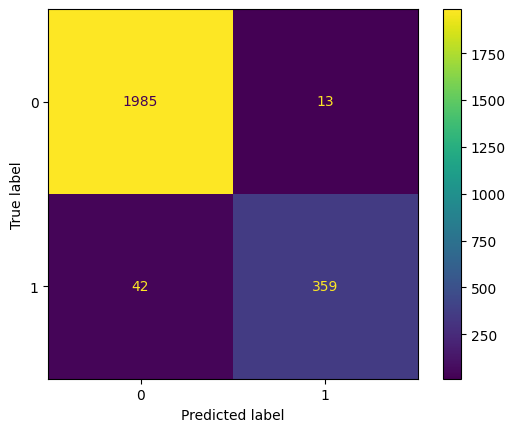

In [49]:
# this grid is the XGBFClassifer only
pred = grid.predict(X_test)

cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [50]:
training_results = []

testing_results = []

def evaluate_Model(model,X_train,y_train,X_test,y_test):
  training_pred = model.predict(X_train)
  testing_pred = model.predict(X_test)
  training_f1_score = f1_score(y_train,training_pred)
  testing_f1_score = f1_score(y_test,testing_pred)
  return testing_pred ,training_f1_score , testing_f1_score

In [51]:
for models in grids:
  x = 0
  test_Pred , train_acc , test_acc = evaluate_Model(models[x],X_train,y_train,X_test,y_test)
  x = x + 1
  training_results.append(train_acc)
  testing_results.append(test_acc)

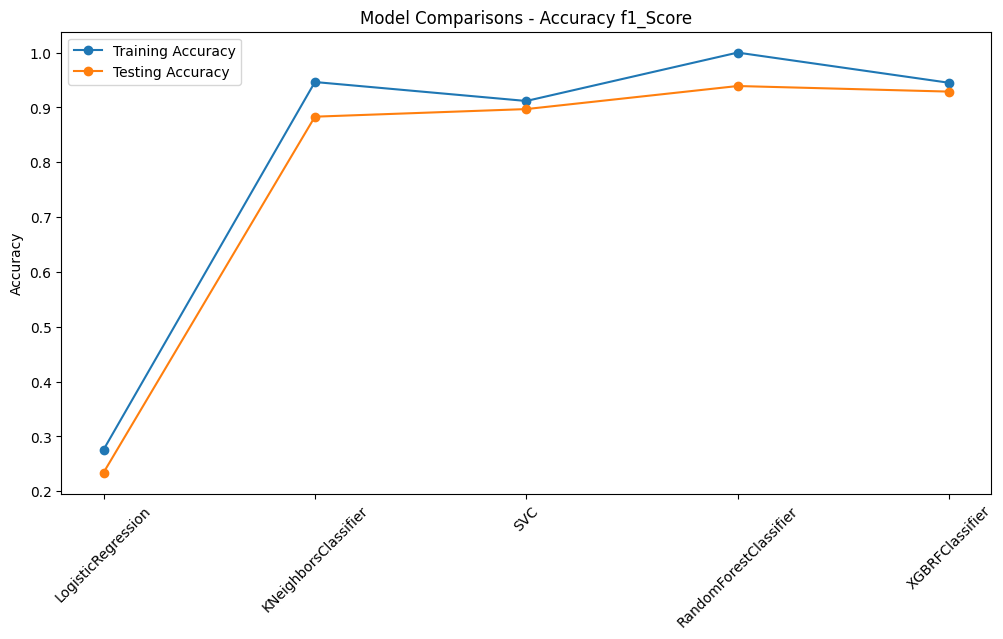

In [52]:
plt.figure(figsize=(12,6))
plt.plot(models_name, training_results, 'o-', label="Training Accuracy")
plt.plot(models_name, testing_results, 'o-', label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"Model Comparisons - Accuracy f1_Score")
plt.show()

####GradientBoostingClassifier - Round 2

In [70]:
Model = GradientBoostingClassifier()

pipes = Pipeline([
    ('Scaler',StandardScaler()),
    ('Models',Model)
])

Model_params = {'Models__criterion':['squared_error','friedman_mse'],'Models__learning_rate':[0.001,0.01,0.1,1]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

Gradient_grid = GridSearchCV(
    estimator=pipes,
    param_grid=Model_params,
    scoring=scoring,
    cv=4,
    refit='roc_auc'
)


In [71]:
%%time

Gradient_grid.fit(X_train,y_train)

CPU times: user 31.9 s, sys: 158 ms, total: 32 s
Wall time: 32 s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('Models',
                                        GradientBoostingClassifier())]),
             param_grid={'Models__criterion': ['squared_error', 'friedman_mse'],
                         'Models__learning_rate': [0.001, 0.01, 0.1, 1]},
             refit='roc_auc',
             scoring={'f1', 'accuracy', 'roc_auc', 'precision', 'recall'})

In [73]:
Gradient_grid.best_score_ * 100

98.41107153434805

In [80]:
def get_scores(model_name:str, model, X_test_data, y_test_data):

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

In [81]:
rf1_test_scores = get_scores('GradiantBoostingClassifier', Gradient_grid, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,GradiantBoostingClassifier,0.960317,0.905237,0.931964,0.977907,0.948865


##pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders